In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('data_stocks.csv')

In [3]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


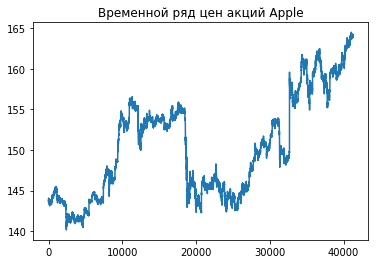

In [4]:
plt.plot(data['NASDAQ.AAPL'])
plt.title('Временной ряд цен акций Apple')
plt.show()

In [5]:
data.drop(['DATE'],axis=1, inplace=True)

In [6]:
data_ = data.values

In [7]:
n = data.shape[0]
p = data.shape[1]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
data_train = data_[np.arange(train_start, train_end), :]
data_test = data_[np.arange(test_start, test_end), :]

In [11]:
# Масштабирование данных
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)
# Построение X и y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

In [113]:
import tensorflow as tf

In [114]:
# Инициализаторы
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [115]:
# Параметры архитектуры модели
n_stocks = 500
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128
n_target = 1
# Уровень 1: Переменные для скрытых весов и смещений
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]),name="w1")
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]),name="b1")
# Уровень 2: Переменные для скрытых весов и смещений
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]),name="w2")
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]),name="b2")
# Уровень 3: Переменные для скрытых весов и смещений
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]),name="w3")
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]), name="b3")
# Уровень 4: Переменные для скрытых весов и смещений
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]), name="w4")
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]), name="b4")

# Уровень выходных данных: Переменные для скрытых весов и смещений
W_out = tf.Variable(weight_initializer([n_neurons_4, n_target]), name="w_o")
bias_out = tf.Variable(bias_initializer([n_target]), name="b_o")

In [116]:
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks], name='X')
Y = tf.placeholder(dtype=tf.float32, shape=[None], name="Y")

In [117]:
# Скрытый уровень
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Выходной уровень (должен быть транспонирован)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

In [118]:
# Функция стоимости
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [119]:
opt = tf.train.AdamOptimizer().minimize(mse)

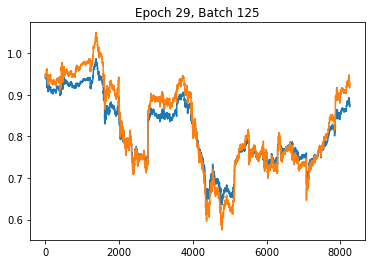

0.00066281


In [120]:
# Создание сессии
net = tf.Session()
# Запуск инициализатора
net.run(tf.global_variables_initializer())

# Настройка интерактивного графика 
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.show()

# Количество эпох и размер куска данных
epochs = 30
batch_size = 256

for e in range(epochs):

    # Перемешивание данных для обучения
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Обучение мини-партией
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})
        
        if np.mod(i, 5) == 0:
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            clear_output()
            plt.plot(pred.reshape(8254,))
            plt.plot(y_test)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            plt.pause(0.01)

mse_final = net.run(mse, feed_dict={X: X_test, Y: y_test})
print(mse_final)

In [92]:
from IPython.display import clear_output

In [121]:
summary_writer = tf.summary.FileWriter('log_simple_graph')

summary_writer.add_graph(net.graph)

In [101]:
tf.reset_default_graph()